In [68]:
from keras.datasets import reuters

In [69]:
(trainData, trainLabels), (testData, testLabels)=reuters.load_data(num_words=10000) 

In [70]:
len(traindata)
# len(testdata)

8982

In [71]:
word_index=reuters.get_word_index()
reverseWordIndex=dict([(value,key) for (key, value) 
      in word_index.items()])
reverseWordIndex

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [72]:
decodedNews=" ".join([reverseWordIndex.get(i-3,'?') 
          for i in trainData[0]]) # 4번부터가 실제 단어임
decodedNews

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [73]:
import numpy as np

In [74]:
def vec_seq(seq, dimension=10000):
    res=np.zeros((len(seq),dimension))  #(8982,10000)
    for i, sequence in enumerate(seq):
        res[i, sequence]=1
    return res
    #print(res.shape)
xTrain=vec_seq(trainData)    
xTest=vec_seq(testData)   

In [75]:
def toOneHot(labels, dimension = 46):
    res = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        res[i, label] = 1
    return res

OneHotTrainLabel = toOneHot(trainlabel)
OneHotTestLabel = toOneHot(testlabel)


In [76]:
OneHotTestLabel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
from keras.utils.np_utils import to_categorical
oneHotTrainLabels=to_categorical(trainLabels)
oneHotTestLabels=to_categorical(testLabels)

In [78]:
from keras import models, layers


In [79]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape =(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [80]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
xTrain.shape
xVal = xTrain[:1000]
pxTrain = xTrain[1000:]
# xTrain.shape
yVal = OneHotTrainLabel[:1000]
pyTrain = OneHotTrainLabel[1000:]
 

In [87]:
histroy = model.fit(pxTrain, pyTrain, epochs=30 , batch_size= 512, validation_data = (xVal, yVal))

# 트레인 데이터의 정확도는 높이지지만, val_acc 은 떨어지고 있음 (완만하게 하강하는 모습을 보임)

Epoch 1/30
16/16 [==============================] - 1s 32ms/step - loss: 0.0730 - accuracy: 0.9577 - val_loss: 1.5411 - val_accuracy: 0.7780
Epoch 2/30
16/16 [==============================] - 1s 38ms/step - loss: 0.0714 - accuracy: 0.9590 - val_loss: 1.6153 - val_accuracy: 0.7670
Epoch 3/30
16/16 [==============================] - 1s 39ms/step - loss: 0.0699 - accuracy: 0.9589 - val_loss: 1.6419 - val_accuracy: 0.7750
Epoch 4/30
16/16 [==============================] - 1s 37ms/step - loss: 0.0706 - accuracy: 0.9595 - val_loss: 1.6907 - val_accuracy: 0.7630
Epoch 5/30
16/16 [==============================] - 1s 39ms/step - loss: 0.0713 - accuracy: 0.9575 - val_loss: 1.6377 - val_accuracy: 0.7720
Epoch 6/30
16/16 [==============================] - 1s 37ms/step - loss: 0.0693 - accuracy: 0.9579 - val_loss: 1.6928 - val_accuracy: 0.7700
Epoch 7/30
16/16 [==============================] - 1s 34ms/step - loss: 0.0704 - accuracy: 0.9578 - val_loss: 1.7002 - val_accuracy: 0.7580
Epoch 8/30
16

Epoch 1/30
16/16 [==============================] - 1s 34ms/step - loss: 0.3750 - accuracy: 0.9235 - val_loss: 0.8690 - val_accuracy: 0.8260
Epoch 2/30
16/16 [==============================] - 1s 33ms/step - loss: 0.2933 - accuracy: 0.9380 - val_loss: 0.8903 - val_accuracy: 0.8220
Epoch 3/30
16/16 [==============================] - 1s 37ms/step - loss: 0.2388 - accuracy: 0.9436 - val_loss: 0.8926 - val_accuracy: 0.8210
Epoch 4/30
16/16 [==============================] - 1s 33ms/step - loss: 0.1996 - accuracy: 0.9506 - val_loss: 0.9503 - val_accuracy: 0.8050
Epoch 5/30
16/16 [==============================] - 1s 35ms/step - loss: 0.1758 - accuracy: 0.9529 - val_loss: 0.9527 - val_accuracy: 0.8080
Epoch 6/30
16/16 [==============================] - 1s 34ms/step - loss: 0.1576 - accuracy: 0.9538 - val_loss: 0.9936 - val_accuracy: 0.8080
Epoch 7/30
16/16 [==============================] - 1s 35ms/step - loss: 0.1436 - accuracy: 0.9551 - val_loss: 0.9504 - val_accuracy: 0.8170
Epoch 8/30
16

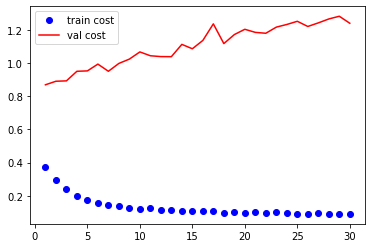

In [91]:
history=model.fit(pxTrain, pyTrain, 
            epochs=30, batch_size=512,
            validation_data=(xVal, yVal))
histDict=history.history
histDict.keys()
history.history['loss']
import matplotlib.pyplot as plt 
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['loss'],'bo', label='train cost') # 1~30
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['val_loss'],'r', label='val cost') # 1~30
plt.legend()

In [96]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape =(10000,)))
model.add(layers.Dense(128, activation='relu')) # 히든
model.add(layers.Dense(64, activation='relu')) # 하둔
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(pxTrain, pyTrain, epochs=5 , batch_size= 512, validation_data = (xVal, yVal))

result = model.evaluate(xTest, oneHotTestLabels)
print(result)


Epoch 1/5
16/16 [==============================] - 1s 65ms/step - loss: 2.2526 - accuracy: 0.5461 - val_loss: 1.3675 - val_accuracy: 0.6920
Epoch 2/5
16/16 [==============================] - 1s 58ms/step - loss: 1.0994 - accuracy: 0.7523 - val_loss: 1.0639 - val_accuracy: 0.7710
Epoch 3/5
16/16 [==============================] - 1s 55ms/step - loss: 0.7056 - accuracy: 0.8433 - val_loss: 0.9558 - val_accuracy: 0.8030
Epoch 4/5
16/16 [==============================] - 1s 53ms/step - loss: 0.5139 - accuracy: 0.8862 - val_loss: 0.8977 - val_accuracy: 0.8170
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 1.0419 - accuracy: 0.7778
[1.0419422388076782, 0.777827262878418]


In [100]:
model.predict(xTest).shape # 46개 분류라서 shape ->(2246, 46)
model.predict(xTest)[0] #0.00000019 이런 식으로 나오기에 거의 0에 가깝게 나옴

array([1.9213854e-07, 2.8464087e-06, 3.6971306e-07, 9.9368250e-01,
       5.5854940e-03, 1.1117120e-06, 6.0498469e-06, 5.6385397e-06,
       9.8196142e-05, 2.2143133e-06, 1.5892036e-05, 4.9208393e-05,
       1.7192115e-06, 4.0975603e-05, 1.4282031e-06, 1.2589024e-06,
       7.8678704e-06, 1.4876428e-05, 2.0439852e-06, 4.6493740e-05,
       5.6814119e-05, 3.0779425e-04, 1.6715829e-07, 4.2059814e-06,
       6.5407676e-07, 1.0763548e-06, 2.4334216e-07, 1.5537167e-07,
       1.0602089e-05, 1.9503452e-06, 1.1083117e-06, 7.4333748e-06,
       1.5606520e-05, 8.3399277e-07, 1.8889686e-07, 1.6953120e-06,
       8.1997323e-06, 2.6967048e-06, 3.7106472e-06, 4.3853483e-06,
       1.8870655e-07, 1.6900962e-06, 4.8790957e-07, 3.2776370e-08,
       7.5472400e-07, 1.0279077e-06], dtype=float32)

In [108]:
predictions = model.predict(xTest)
np.sum(predictions[2])
np.argmax(predictions[0])

3

히든 계층의 퍼셉트론(노드, 유닛)의 개수가 너무 적으면, 오히려 데이터에 대한 손실이 발생 -> 정확도가 낮아질 수 있음  
퍼셉트론의 개수를 적절하게 조절하면 데이터를 압축해서 노이즈가 줄어드는 효과를 얻을 수 있음   
예를 들어) 입력 데이터의 10000 차원 -> 256 차원 줄임

반대로 퍼셉트론의 개수를 데이터보다 크게 줄 수 있음  
예를 들어) 입력 데이터의 10 차원 -> 256 차원   
이런 경우에는 레이블을 표현허기 위한 더 많은 정보를 담을 수 있으므로 정확도가 더 올라갈 수 있음   

